# Task 3 - Feature Engineering

In [7]:
import numpy as np
from datasets import Dataset, ClassLabel, Sequence
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForTokenClassification
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath("../src"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("..")
print(os.getcwd()) 

d:\KAIM 5,6,7\Week-5\Credit-Risk-Probability-Model


In [3]:
df = pd.read_csv("Data/raw/data.csv")  # Make sure your file is named data.csv and in the working directory
# df

In [4]:
features = [
    "Amount", "Value", "CountryCode", "ProviderId",
    "ProductCategory", "ChannelId", "PricingStrategy"
           ]
target = "FraudResult"  # 1 = Fraud, 0 = Not Fraud

In [5]:
X = df[features]
y = df[target]

In [8]:
categorical_cols = ["ProviderId", "ProductCategory", "ChannelId", "PricingStrategy"]
numerical_cols = ["Amount", "Value", "CountryCode"]

preprocessor = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_cols),
    ("categorical", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [9]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", round(roc_auc_score(y_test, y_proba),4))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.60      0.17      0.26        36

    accuracy                           1.00     19133
   macro avg       0.80      0.58      0.63     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9973


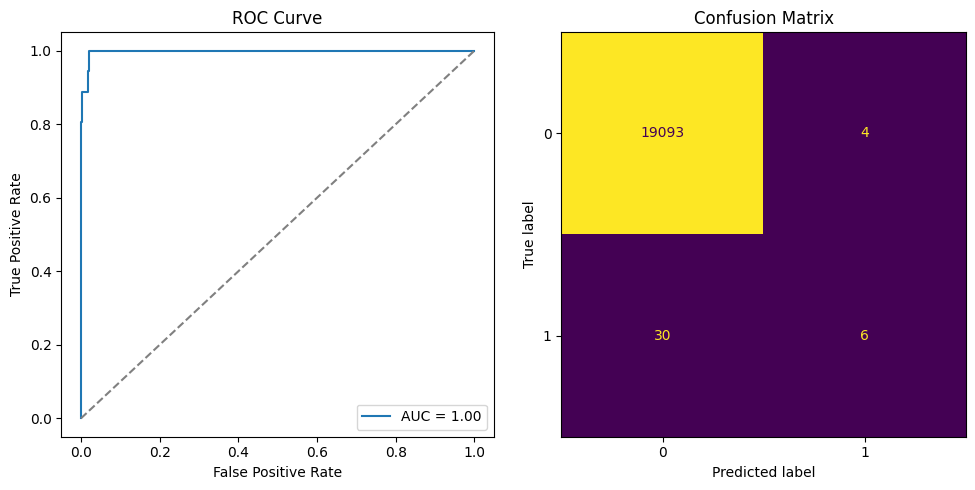

In [11]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(10, 5))

# ROC Curve Plot
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Confusion Matrix Plot
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

In [12]:
import joblib
joblib.dump(pipeline, "logistic_model.pkl")

['logistic_model.pkl']

In [3]:
from  train_model import *

In [4]:
import pandas as pd
# from src.processing.data_pipeline import prepare_data

df = pd.read_csv("Data/raw/data.csv")
df_clean, pipeline, final_features = prepare_data(df)

X = df_clean[final_features]

# Optional: transform for model input
try:
    X_transformed = pipeline.fit_transform(X)
    print("Transformed data shape:", X_transformed.shape)
except Exception as e:
    print(f" Transformation failed: {e}")

 Cleaning and transforming raw data...
 Preprocessing complete.
Transformed data shape: (95662, 4)


In [6]:
# svd = TruncatedSVD(n_components=20)
# X_reduced = svd.fit_transform(X_transformed)
# print("Reduced shape:", X_reduced.shape)
# X_reduced 

In [7]:
# # # Usage:
# train_and_evaluate_models("Data/processed/cleaned_data.csv")

In [7]:
numeric_features = ['Amount', 'Value']
categorical_features = ['CurrencyCode', 'CountryCode']

prep, final_features = build_preprocessing_pipeline(df)

print("\n Preprocessor Structure:\n")
print(prep)

# Transform

X = df[final_features]
X_transformed = prep.fit_transform(X)
print(f"\n Transformed shape: {X_transformed.shape}")


 Preprocessor Structure:

ColumnTransformer(transformers=[('numer',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Amount', 'Value']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['CurrencyCode', 'CountryCode'])])

 Transformed shape: (95662, 4)
